In [ ]:
- title: Занятие 8
- author: Svetlana Medvedeva
- date: 2024-10-22
- slug: 2024_lpr_lab08
- ipynb_url: download/2024_lpr_lab08.ipynb

# Лабораторное занятие 8
## Библиотека Pandas


Библиотека **Pandas** представляет собой библиотеку Python для обработки и анализа табличных данных. Название этой библиотеки происходит от «panel data» («панельные данные»).

Для установки pandas выполним в командной строке команду:

In [1]:
# Если pandas уже установлен, то можно ничего не делать.
# Иначе нужно убрать комментарий ниже.

#!pip install pandas

In [1]:
import pandas as pd
import numpy as np

В **Pandas** есть два класса объектов: **Series** (одномерный массив, в котором можно хранить значения любого типа данных) и **DataFrame** (двумерный массив (таблица), в котором столбцами являются объекты класса Series).

Создать Series можно следующим образом:

```python
s = pd.Series(data, index=index)
```

здесь в качестве `data` может быть массив numpy, словарь или число, а в аргумент index передаётся список меток осей.


In [2]:
s = pd.Series(np.arange(5), index=["a", "b", "c", "d", "e"])
print(s)
print()
s = pd.Series(np.linspace(0, 1, 5))
print(s)

a    0
b    1
c    2
d    3
e    4
dtype: int64

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64


Если в качестве data задано число, то количество элементов в Series будет равно числу меток в index, а значения будут равны data:

In [3]:
index = ["a", "b", "c"]
print(pd.Series(5, index=index))

a    5
b    5
c    5
dtype: int64


К Series применимы операции взятия элемента по индексу, срезы, поэлементные математические операции аналогично массивам numpy.

In [4]:
s = pd.Series(np.arange(5), index=["a", "b", "c", "d", "e"])
print('Исходный массив: ', s, sep='\n')
print('Взятие одного элемента: ', s["a"], sep='\n')
print('Выбор нескольких элементов: ', s[["a", "d"]], sep='\n')
print('Срез: ', s[1:], sep='\n')
print('Поэлементное сложение: ', s + s, sep='\n')

Исходный массив: 
a    0
b    1
c    2
d    3
e    4
dtype: int64
Взятие одного элемента: 
0
Выбор нескольких элементов: 
a    0
d    3
dtype: int64
Срез: 
b    1
c    2
d    3
e    4
dtype: int64
Поэлементное сложение: 
a    0
b    2
c    4
d    6
e    8
dtype: int64


Объект класса `DataFrame` можно создать используя словарь Python:

In [5]:
table_dict = {"student": ["Студент_1", "Студент_2", "Студент_3"],
                       "math": [5, 5, 4],
                       "physics": [4, 5, 4]}
students = pd.DataFrame(table_dict)
print(students)

     student  math  physics
0  Студент_1     5        4
1  Студент_2     5        5
2  Студент_3     4        4


Если мы попытаемся создать датафрейм из списков различной длины, то получим ошибку, т. е. списки из которых формируются значения в столбцах должны быть одинаковой длины.

In [6]:
table_dict = {"student": ["Студент_1", "Студент_2", "Студент_3", "Студент_4"],
                       "math": [5, 5, 4],
                       "physics": [4, 5, 4]}
students = pd.DataFrame(table_dict)
print(students)

ValueError: All arrays must be of the same length

Значения индексов и столбцов датафрейма моно просмотреть с помощью атрибутов .index и .columns, соответственно.

In [7]:
print(students.index)
print(students.columns)

RangeIndex(start=0, stop=3, step=1)
Index(['student', 'math', 'physics'], dtype='object')


Выполнить переиндексацию (в качестве индексов будут номера строк начиная с 0) можно с помощью `df.reset_index()`.

In [8]:
students.reset_index()

,index,student,math,physics
0,0,Студент_1,5,4
1,1,Студент_2,5,5
2,2,Студент_3,4,4


Если необходимо в качестве индекса установить какой-либо из столбцов, то это можно сделать с помощью:

In [9]:
students.set_index('student')

,math,physics
student,,
Студент_1,5,4
Студент_2,5,5
Студент_3,4,4


Значение индекса можно заменить следующим способом:

In [10]:
students.index = ["A", "B", "C"]
print(students)

     student  math  physics
A  Студент_1     5        4
B  Студент_2     5        5
C  Студент_3     4        4


## Загрузка данных

Данные могут храниться в различных форматах. Наиболее популярными являются CSV, Excel, JSON, реьд и другие.

Для загрузки данных из **.csv** файла используется функция `read_csv()`. Аргумент file является строкой, в которой записан путь до файла с датасетом. Для записи данных из DataFrame в CSV-файл используется метод `to_csv(file)`.
У этой функции много аргументов (см. [документацию](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)), первый из которых - название считываемого файла с данными, второй - sep - разделитель, по умолчанию это запятая.
Данные в csv файлах (обычно, но не всегда) записаны в виде "таблицы". Одна запись - одна строка, данные столбцов разделяются запятыми.

Чтобы загрузить **Excel** файл потребуется функция `read_excel()`. Для записи данных из DataFrame в Excel-файл используется метод `to_excel()`.


Из формата **JSON** можно загрузить данные с помощью функции `read_json()`. Для записи данных из DataFrame в JSON используется метод `to_json()`.

Для работы с файлом его, как и обычный текстовый файл (впрочем, это и есть обычный текстовый файл!), удобнее положить в ту же директорию, где лежит ноутбук. Затем вы можете прямо через jupyter открыть файл `csv` и увидеть, как он выглядит.

In [11]:
from io import StringIO
df = pd.DataFrame([['a', 'b'], ['c', 'd']],
                  index=['row 1', 'row 2'],
                  columns=['col 1', 'col 2'])

In [12]:
df.to_json(orient='index')

'{"row 1":{"col 1":"a","col 2":"b"},"row 2":{"col 1":"c","col 2":"d"}}'

Скачайте файл [telecom_churn.csv](http://python.mipt.ru/lpr/extra/lab08/telecom_churn.csv) для выполнения последующего кода

In [13]:
f = pd.read_csv("telecom_churn.csv")

## Обзор данных

Посмотреть начало и конец таблицы (по умолчанию 5 строк, но это настраиваемый параметр) - функции `head` и `tail`. Описание данных - `describe`, `info`. Размер таблицы - `shape`, названия колонок - `columns`. Обратите внимание, что `columns` возвращает итерируемый объект.

In [14]:
f.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
f.head(7)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False


In [16]:
f.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [17]:
f.tail(7)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3326,OH,96,415,No,No,0,106.6,128,18.12,284.8,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


Вывести заданное число случайно выбранных строк можно через метод `.sample()`.

In [18]:
f.sample(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
564,CT,66,415,No,Yes,29,229.4,104,39.00,257.4,84,21.88,231.5,119,10.42,8.0,1,2.16,2,False
1922,GA,71,415,No,No,0,258.4,132,43.93,126.8,119,10.78,182.4,87,8.21,9.7,8,2.62,4,False
168,AZ,94,408,No,Yes,38,170.1,124,28.92,193.3,116,16.43,105.9,73,4.77,12.8,4,3.46,1,False
701,RI,94,415,No,No,0,139.4,95,23.70,159.1,92,13.52,128.2,129,5.77,7.7,3,2.08,0,False
464,ND,105,415,No,Yes,23,193.5,85,32.90,220.2,90,18.72,272.4,111,12.26,8.5,5,2.30,0,False


Для того, чтобы при каждом запуске кода отбирались одни и теже строки нужно зафиксировать `random_state`.

In [19]:
f.sample(5, random_state=123)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
465,NV,71,415,Yes,No,0,178.2,113,30.29,167.8,94,14.26,182.1,111,8.19,13.6,3,3.67,3,True
2416,IA,113,510,No,No,0,156.0,141,26.52,256.8,72,21.83,175.3,123,7.89,11.9,5,3.21,2,False
1785,MO,45,510,No,Yes,29,135.8,104,23.09,222.5,101,18.91,235.6,92,10.60,7.9,6,2.13,2,False
1316,MT,10,510,No,No,0,183.0,103,31.11,214.8,77,18.26,206.4,73,9.29,8.7,6,2.35,2,False
446,TX,88,510,No,No,0,138.3,116,23.51,236.0,138,20.06,179.1,110,8.06,9.6,4,2.59,3,False


In [20]:
f.shape

(3333, 20)

In [21]:
f.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [22]:
f.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [23]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Небольшое, но важное отступление. Глубоко понимать это пока не обязательно. Обратите внимание, что функция `print` возвращает строковое представление объекта и она не необходима, чтобы вывести объект. 2 ячейки сработают одинаково:

In [24]:
a = 1
print(a)

1


In [25]:
a = 1
a

1

При этом для некоторых объектов (для которых стандартные функции `__str__` и `__repr__` возвращают разные значения) два способа вывода сработают несколько по-разному:

In [26]:
a = np.array([1.0, 2.0])
print(a)

[1. 2.]


In [27]:
a = np.array([1.0, 2.0])
a

array([1., 2.])

Такая же ситуация с pandas dataframe'ами. Без print получится красивее, чем с ним, но фактически это одно и то же:

In [28]:
print(f)

     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                   

In [29]:
f

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [30]:
display(f)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


2 варианта синтаксиса для просмотра содержимого столбца:

In [31]:
f.State

0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
3328    AZ
3329    WV
3330    RI
3331    CT
3332    TN
Name: State, Length: 3333, dtype: object

In [32]:
f['State']

0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
3328    AZ
3329    WV
3330    RI
3331    CT
3332    TN
Name: State, Length: 3333, dtype: object

Обратите внимание, что таблица и столбцы имеют разный тип:

In [33]:
type(f), type(f.State), type(f['State'])

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

Тем не менее, мы можем сделать именно датафрейм из одного столбца следующим образом:

In [34]:
f[['State']]

,State
0,KS
1,OH
2,NJ
3,OH
4,OK
...,...
3328,AZ
3329,WV
3330,RI
3331,CT


In [35]:
type(f[['State']]), type(f['State'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

Это способ обращения к "срезам" таблицы по названиям столбцов. Еще пример:

In [37]:
f[['State', 'Churn']]

,State,Churn
0,KS,False
1,OH,False
2,NJ,False
3,OH,False
4,OK,False
...,...,...
3328,AZ,False
3329,WV,False
3330,RI,False
3331,CT,False


Просмотр уникальных значений в столбце и их числа:

In [36]:
f.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

Подсчитать число уникальных значений можно через метод `.value_counts()`.

In [37]:
f.State.value_counts()

State
WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
ID     73
MI     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NJ     68
NC     68
MT     68
WA     66
CO     66
NV     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

In [38]:
f.State.nunique()

51

Обращение к элементу объекта `pd.Series`:

In [39]:
f.State[0]

'KS'

Полный набор функций, применимых к столбцу можно посмотреть следующим образом. Здесь используется стандартная функция `__dir__()`, которая выводит список атрибутов и методов объекта.

In [40]:
f.State.__dir__()

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__

С `pd.DataFrame` привычный способ обращения по индексам не сработает:

In [41]:
f[0][0]

KeyError: 0

Основной способ - использование `loc` и `iloc`. `loc` дает индексацию по "настоящим" индексам - названиям столбцов и названиям строк. В нашем случае, названия строк - целые числа, как обычные индексы. `iloc` позволяет осуществлять стандартную численную индексацию, как для `numpy` массивов.

In [42]:
f.iloc[0] # первая строка

State                        KS
Account length              128
Area code                   415
International plan           No
Voice mail plan             Yes
Number vmail messages        25
Total day minutes         265.1
Total day calls             110
Total day charge          45.07
Total eve minutes         197.4
Total eve calls              99
Total eve charge          16.78
Total night minutes       244.7
Total night calls            91
Total night charge        11.01
Total intl minutes         10.0
Total intl calls              3
Total intl charge           2.7
Customer service calls        1
Churn                     False
Name: 0, dtype: object

In [43]:
f.iloc[0][0]

C:\Users\kleme\AppData\Local\Temp\ipykernel_51676\2911758440.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f.iloc[0][0]


'KS'

In [44]:
f.iloc[0, 0]

'KS'

In [45]:
f.iloc[[0, 0]]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [46]:
f.iloc[[1, 2, 5, 1]]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False


In [47]:
f.loc[[1, 2, 5, 1]]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False


In [48]:
f.loc[[1, 2, 5, 1], ["State", "Account length"]]

,State,Account length
1,OH,107
2,NJ,137
5,AL,118
1,OH,107


In [49]:
f.iloc[[1, 2, 5, 1], [0, 1]]

,State,Account length
1,OH,107
2,NJ,137
5,AL,118
1,OH,107


Следующая ячейка вернет ошибку:

In [50]:
f.iloc[[1, 2, 5, 1], ["State", "Account length"]]

IndexError: .iloc requires numeric indexers, got ['State' 'Account length']

In [51]:
f.iloc[:5, :4]

,State,Account length,Area code,International plan
0,KS,128,415,No
1,OH,107,415,No
2,NJ,137,415,No
3,OH,84,408,Yes
4,OK,75,415,Yes


In [52]:
f.loc[:, ["State", "Account length"]]

,State,Account length
0,KS,128
1,OH,107
2,NJ,137
3,OH,84
4,OK,75
...,...,...
3328,AZ,192
3329,WV,68
3330,RI,28
3331,CT,184


In [53]:
f.loc[4:9, ["State", "Account length", "Area code", "International plan"]]

,State,Account length,Area code,International plan
4,OK,75,415,Yes
5,AL,118,510,Yes
6,MA,121,510,No
7,MO,147,415,Yes
8,LA,117,408,No
9,WV,141,415,Yes


In [54]:
f.loc[4:9, "State": "International plan"]

,State,Account length,Area code,International plan
4,OK,75,415,Yes
5,AL,118,510,Yes
6,MA,121,510,No
7,MO,147,415,Yes
8,LA,117,408,No
9,WV,141,415,Yes


Обратите внимание, что `loc` включает и строки соответствующие и начальному, и конечному индексам.

Сохраним этот датафрейм в новую переменную и рассмотрим отличие `loc` и `iloc` в работе по целочисленным индексам строк

In [55]:
new_f = f.loc[4:9, ["State", "Account length", "Area code", "International plan"]]

In [56]:
new_f.iloc[:5]

,State,Account length,Area code,International plan
4,OK,75,415,Yes
5,AL,118,510,Yes
6,MA,121,510,No
7,MO,147,415,Yes
8,LA,117,408,No


In [57]:
new_f.loc[:5]

,State,Account length,Area code,International plan
4,OK,75,415,Yes
5,AL,118,510,Yes


**Упражнение 1.** Объясните различие поведения `loc` и `iloc` для `new_f`.

loc обращается по названиям строк, а iloc по их индексам. 
Так, в new_f у строк названия (4, 5, 6, 7, 8), а индексы (0, 1, 2, 3, 4)

#### Создание датафрейма и присваивание по индексам

In [58]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]}, index = ["first", "second", "third"])
df

,A,B
first,1,4
second,2,5
third,3,6


In [59]:
df.iloc[0, 0] = 100
df

,A,B
first,100,4
second,2,5
third,3,6


In [60]:
df.loc["second", "B"] = 31
df

,A,B
first,100,4
second,2,31
third,3,6


In [61]:
df.iloc[2] = 5
df

,A,B
first,100,4
second,2,31
third,5,5


In [62]:
df.loc["B"] = 0
df

,A,B
first,100,4
second,2,31
third,5,5
B,0,0


In [63]:
df.loc[:, "B"] = 0
df

,A,B
first,100,0
second,2,0
third,5,0
B,0,0


In [64]:
df = pd.DataFrame({"A": [1, 2, 3, 4], "B": [5, 6, 7, 8]})
df

,A,B
0,1,5
1,2,6
2,3,7
3,4,8


In [65]:
df.iloc[1:2, :] = -1
df

,A,B
0,1,5
1,-1,-1
2,3,7
3,4,8


In [66]:
df.loc[1:2, :] = -2
df

,A,B
0,1,5
1,-2,-2
2,-2,-2
3,4,8


Еще раз убеждаемся, что `loc` включает оба конца "среза", а `iloc` - полуинтервал, как например обычные срезы.

#### Создание нового столбца

In [67]:
df["C"] = 1
df

,A,B,C
0,1,5,1
1,-2,-2,1
2,-2,-2,1
3,4,8,1


In [68]:
df["D"] = df["A"] + df["B"]
df

,A,B,C,D
0,1,5,1,6
1,-2,-2,1,-4
2,-2,-2,1,-4
3,4,8,1,12


In [69]:
df["E"] = df["D"].apply(lambda x: x ** 2)
df

,A,B,C,D,E
0,1,5,1,6,36
1,-2,-2,1,-4,16
2,-2,-2,1,-4,16
3,4,8,1,12,144


In [70]:
df["F"] = df[["A", "C", "E"]].apply(lambda x: x.sum(), axis=1)
df

,A,B,C,D,E,F
0,1,5,1,6,36,38
1,-2,-2,1,-4,16,15
2,-2,-2,1,-4,16,15
3,4,8,1,12,144,149


**Упражнение 2.** Объясните последний результат.

Сложили стобцы A, C и E по первой оси, то бишь по строчкам, и засунули в новый столбец F

## Срезы с условиями и аггрегация

In [71]:
f[f.Churn == True]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [72]:
f[f["Area code"] == 408]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
12,IA,168,408,No,No,0,128.8,96,21.90,104.9,71,8.92,141.1,128,6.35,11.2,2,3.02,1,False
16,ID,85,408,No,Yes,27,196.4,139,33.39,280.9,90,23.88,89.3,75,4.02,13.8,4,3.73,1,False
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,VT,100,408,Yes,No,0,219.4,112,37.30,225.7,102,19.18,255.3,95,11.49,12.0,4,3.24,4,False
3312,SC,181,408,No,No,0,229.9,130,39.08,144.4,93,12.27,262.4,110,11.81,14.2,4,3.83,2,False
3313,ID,127,408,No,No,0,102.8,128,17.48,143.7,95,12.21,191.4,97,8.61,10.0,5,2.70,1,False
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [73]:
f[f["Area code"] == 408].loc[3]

State                        OH
Account length               84
Area code                   408
International plan          Yes
Voice mail plan              No
Number vmail messages         0
Total day minutes         299.4
Total day calls              71
Total day charge           50.9
Total eve minutes          61.9
Total eve calls              88
Total eve charge           5.26
Total night minutes       196.9
Total night calls            89
Total night charge         8.86
Total intl minutes          6.6
Total intl calls              7
Total intl charge          1.78
Customer service calls        2
Churn                     False
Name: 3, dtype: object

In [74]:
f[f["Area code"] == 408].loc[3] == f[f["Area code"] == 408].iloc[0]

State                     True
Account length            True
Area code                 True
International plan        True
Voice mail plan           True
Number vmail messages     True
Total day minutes         True
Total day calls           True
Total day charge          True
Total eve minutes         True
Total eve calls           True
Total eve charge          True
Total night minutes       True
Total night calls         True
Total night charge        True
Total intl minutes        True
Total intl calls          True
Total intl charge         True
Customer service calls    True
Churn                     True
Name: 3, dtype: bool

In [75]:
f[f.Churn == True]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [76]:
f[f.Churn == True].mean(numeric_only=True)

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [77]:
f[f.Churn == True].sum()

State                     INNYCOAZMDIDWYCOTXDCNYTXINNJLAMSIDMENVMSMSVTOH...
Account length                                                        49587
Area code                                                            211466
International plan        NoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYe...
Voice mail plan           NoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYes...
Number vmail messages                                                  2471
Total day minutes                                                   99939.5
Total day calls                                                       48945
Total day charge                                                   16989.97
Total eve minutes                                                  102594.1
Total eve calls                                                       48571
Total eve charge                                                    8720.55
Total night minutes                                                 99126.9
Total night 

Выборка по нескольким условиям требует скобок, т.к. операции `&`, `|`, `~` (и, или, не) имеют более высокий приоритет, чем `==`, `>=`, `<=` и арифметические:

In [78]:
f[(f.Churn == True) & (f["Area code"] == 408)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
57,CO,121,408,No,Yes,30,198.4,129,33.73,75.3,77,6.40,181.2,77,8.15,5.8,3,1.57,3,True
77,NY,144,408,No,No,0,61.6,117,10.47,77.1,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,ME,56,408,No,No,0,221.9,112,37.72,278.2,122,23.65,288.1,85,12.96,7.1,5,1.92,0,True
3205,MS,111,408,No,No,0,294.7,90,50.10,294.6,72,25.04,260.1,121,11.70,10.8,3,2.92,1,True
3246,NC,77,408,Yes,Yes,44,103.2,117,17.54,236.3,86,20.09,203.5,101,9.16,11.9,2,3.21,0,True
3280,AR,76,408,No,No,0,107.3,140,18.24,238.2,133,20.25,271.8,116,12.23,10.0,3,2.70,4,True


Можем посмотреть средние показатели лояльных и нелояльных клиентов (столбец "Churn" показывает, ушел клиент от нас как от оператора связи или нет).

In [79]:
loyal = f[f.Churn == False].mean(numeric_only=True)
unloyal = f[f.Churn == True].mean(numeric_only=True)
pd.DataFrame({"loyal": loyal, "unloyal": unloyal})

,loyal,unloyal
Account length,100.793684,102.664596
Area code,437.074737,437.817805
Number vmail messages,8.604561,5.115942
Total day minutes,175.175754,206.914079
Total day calls,100.283158,101.335404
Total day charge,29.780421,35.175921
Total eve minutes,199.043298,212.410145
Total eve calls,100.038596,100.561077
Total eve charge,16.918909,18.054969
Total night minutes,200.133193,205.231677


`groupby` позволяет делать группировку по уникальным значениям столбца, которые будут играть роль индекса в полученном датафрейме. При этом также нужна функция агрегации (`mean`, `sum`, `max` и прочие), чтобы отобразить полученный объект.

In [80]:
f.groupby("Churn")

In [81]:
f.groupby("Churn").mean(numeric_only=True)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,
False,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


Здесь мы сделали агрегацию всех столбцов функцией `mean`. Часто нам нужна агрегация по конкретному или конкретным столбцам. Посмотрим, например, в каком штате больше всего разговаривают по телефону:

In [82]:
f.groupby(["State"]).agg({"Total day minutes": "mean"})

,Total day minutes
State,
AK,178.384615
AL,186.010000
AR,176.116364
AZ,171.604688
CA,183.564706
CO,178.712121
CT,175.140541
DC,171.379630
DE,174.583607


Максимальное значение времени:

In [83]:
f.groupby(["State"]).agg({"Total day minutes": "mean"}).max()

Total day minutes    197.228571
dtype: float64

Чтобы найти сам штат, можем отсортировать данные:

In [84]:
f.groupby(["State"]).agg({"Total day minutes": "mean"}).sort_values(by="Total day minutes", ascending = False)

,Total day minutes
State,
MD,197.228571
IN,196.525352
NJ,196.225000
KS,191.555714
SD,189.690000
PA,188.375556
ND,187.338710
AL,186.010000
ME,185.262903


**Пример.** Как распределен отток клиентов по штатам? В каких штатах он больше среднего?

In [85]:
f.groupby(["State"]).agg({"Churn": "mean"})

,Churn
State,
AK,0.057692
AL,0.100000
AR,0.200000
AZ,0.062500
CA,0.264706
CO,0.136364
CT,0.162162
DC,0.092593
DE,0.147541


In [86]:
f.groupby(["State"]).agg({"Churn": "mean"}).loc["LA"]

Churn    0.078431
Name: LA, dtype: float64

In [87]:
f.groupby(["State"]).agg({"Churn": "mean"}).mean()

Churn    0.144927
dtype: float64

In [88]:
f.groupby(["State"]).agg({"Churn": "mean"}).mean()[0]

C:\Users\kleme\AppData\Local\Temp\ipykernel_51676\2268095099.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f.groupby(["State"]).agg({"Churn": "mean"}).mean()[0]


np.float64(0.14492688214643257)

In [89]:
m = f.groupby(["State"]).agg({"Churn": "mean"}).mean()[0]
new_dataframe = f.groupby(["State"]).agg({"Churn": "mean"})
new_dataframe[new_dataframe.Churn > m]

C:\Users\kleme\AppData\Local\Temp\ipykernel_51676\321093074.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = f.groupby(["State"]).agg({"Churn": "mean"}).mean()[0]


,Churn
State,
AR,0.200000
CA,0.264706
CT,0.162162
DE,0.147541
GA,0.148148
KS,0.185714
MA,0.169231
MD,0.242857
ME,0.209677


## Упражнения.

**Упражнение 3.** Найдите среднее количество звонков `Total day calls` для всего датафрейма.

In [90]:
f.loc[:, "Total day calls"].mean()

np.float64(100.43564356435644)

**Упражнение 4.** Найдите среднее количество звонков `Total day calls` для любого выбранного вами штата.

In [91]:
f.groupby(["State"]).agg({"Total day calls": "mean"}).loc["LA"]

Total day calls    103.509804
Name: LA, dtype: float64

**Упражнение 5.** Создайте датафрейм, в котором будет среднее количество звонков `Total day calls` для каждого штата.

In [92]:
f_mean = f.groupby(["State"]).agg({"Total day calls": "mean"})
f_mean.head()

,Total day calls
State,
AK,95.269231
AL,99.100000
AR,102.145455
AZ,100.109375
CA,104.500000


**Упражнение 6.** Оставьте в созданном датафрейме строки только с теми штатами, где количество звонков `Total day calls` больше среднего по исходному датафрейму.

In [93]:
f_mean[f_mean["Total day calls"] > f["Total day calls"].mean()]

,Total day calls
State,
AR,102.145455
CA,104.500000
FL,101.000000
GA,103.055556
HI,102.811321
IA,103.045455
ID,106.219178
IL,101.689655
IN,107.056338


**Упражнение 7.** Создайте датафрейм, в котором будует средние количества звонков `Total day calls` и `Total eve calls` для каждого штата.

In [94]:
f_means = f.groupby(["State"]).agg({"Total day calls": "mean", "Total eve calls":"mean"})
f_means.head()

,Total day calls,Total eve calls
State,,
AK,95.269231,96.576923
AL,99.100000,98.462500
AR,102.145455,97.836364
AZ,100.109375,102.406250
CA,104.500000,103.088235


**Упражнение 8.** Создайте датафрейм, в котором будует средние количества звонков `Total day calls` и `Total eve calls` для каждого штата, а также столбец со значениями True и False - ответом на вопрос, больше ли дневных звонков, чем вечерних.

In [95]:
f_means["Day greater than evening"] = f_means["Total day calls"] > f_means["Total eve calls"]
f_means.head()

,Total day calls,Total eve calls,Day greater than evening
State,,,
AK,95.269231,96.576923,False
AL,99.100000,98.462500,True
AR,102.145455,97.836364,True
AZ,100.109375,102.406250,False
CA,104.500000,103.088235,True


**Упражнение 9.** Найти долю клиентов (отношение их числа к общему количеству клиентов) с `international plan` и `voice mail plan`.

In [96]:
f[(f["International plan"] == "Yes") & (f["Voice mail plan"] == "Yes")].shape[0] / f.shape[0]

0.027602760276027604

**Упражнение 10.** Найти число уникальных значений `Area code`.

In [ ]:
f["Area code"].nunique()

**Упражнение 11.** Вывести DataFrame из 2 столбцов: число звонков в поддержку; число клиентов, звонивших столько раз. Подсказка: используйте функцию агрегации `count`.

In [ ]:
f.groupby(["Customer service calls"]).agg({"State":"count"}).rename(columns={"State":"Count"})

**Упражнение 12.** Вывести DataFrame из 2 столбцов: число звонков в поддержку; доля оттока (`Churn`). Построить график.

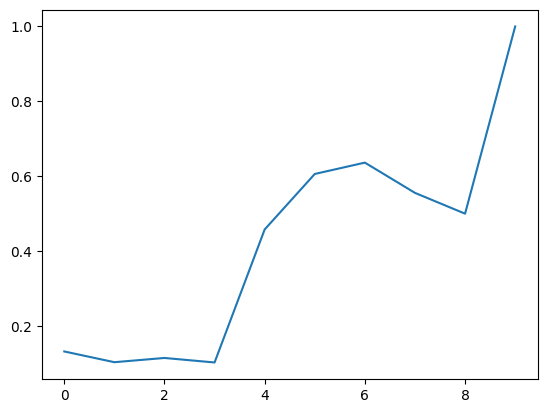

In [97]:
from matplotlib import pyplot as plt
f1 = f.groupby(["Customer service calls"]).agg({"Churn":"mean"})
plt.plot(f1.index, f1["Churn"])

**Упражнение 13.** Найти среднюю длительность международного (`intl`) звонка.

In [98]:
f["Total intl minutes"].sum() / f["Total intl calls"].sum()

np.float64(2.2853918285331547)

**Упражнение 14*.** Какие звонки дольше - дневные, вечерние или ночные? Ответ привести в формате DataFrame $3*3$: строки - число минут, число звонков, среднее время звонка. Столбцы - день, вечер, ночь

In [99]:
f2 = pd.DataFrame([[f["Total day minutes"].sum(), f["Total eve minutes"].sum(), f["Total night minutes"].sum()], 
                   [f["Total day calls"].sum(), f["Total eve calls"].sum(), f["Total night calls"].sum()], 
                   [f["Total day minutes"].sum() / f["Total day calls"].sum(), f["Total eve minutes"].sum() / f["Total eve calls"].sum(), f["Total night minutes"].sum() / f["Total night calls"].sum()]], index=["minutes", "calls count", "avg time"], columns=["day", "evening", "night"])
f2

,day,evening,night
minutes,599190.400000,669867.500000,669506.500000
calls count,334752.000000,333681.000000,333659.000000
avg time,1.789953,2.007509,2.006559


**Упражнение 15.** Сравнить `Total day charge` для оставшихся и ушедших клиентов.

In [100]:
f.groupby(["Churn"]).agg({"Total day charge":"mean"})

,Total day charge
Churn,
False,29.780421
True,35.175921


**Упражнение 16.** Отсортриуйте штаты по `Total day charge` (по возрастанию).

In [101]:
f.groupby(["State"]).agg({"Total day charge":"sum"}).sort_values(by="Total day charge")

,Total day charge
State,
CA,1061.01
IA,1328.60
PA,1441.10
LA,1546.56
DC,1573.31
AK,1576.94
TN,1583.73
HI,1585.39
AR,1646.70


**Упражнение 17.** Сделайте агрегацию по средним показателям для каждой `Area code`.

In [102]:
f.groupby("Area code").mean(numeric_only=True)

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Area code,,,,,,,,,,,,,,,,
408,101.877088,7.668258,177.175418,100.496420,30.120274,201.284248,99.788783,17.109308,199.214678,99.039379,8.964785,10.126372,4.426014,2.734737,1.519093,0.145585
415,101.068882,8.357704,181.592628,100.576435,30.871335,200.652085,100.503927,17.055571,202.037583,100.398187,9.091795,10.343444,4.561934,2.793257,1.554079,0.142598
510,100.246429,8.019048,178.787619,100.097619,30.394429,201.323929,99.671429,17.112940,200.229048,100.601190,9.010310,10.138810,4.370238,2.737857,1.623810,0.148810


**Упражнение 18.** Выведите датафрейм размера $3*2$: столбцы `State`, `Churn` для 100, 102 и 104 строк исходного датафрейма.

In [103]:
f.loc[[100, 102, 104], ["State", "Churn"]]

,State,Churn
100,IA,False
102,VT,False
104,IN,False


**Упражнение 19.** Создайте датафрейм из 2 столбцов, заполненных произвольными числами. Добавьте третий столбец, равный их сумме квадратов.

In [104]:
f4 = pd.DataFrame([[1, 2], [5, 8]])
f4[2] = f4[0] ** 2 + f4[1] ** 2
f4

,0,1,2
0,1,2,5
1,5,8,89


**Упражнение 20.** Добавьте к созданному датафрейму четвертый столбец, равный среднему значению первых трех, *используя* функцию `mean`.

In [105]:
f4[3] = f4.mean(axis=1)
f4

,0,1,2,3
0,1,2,5,2.666667
1,5,8,89,34.000000
